# Audi Data Analysis

In this notebook, we will attempt to determine which features of Audi cars have the most significant influence on their price. First, we shall import the necessary data visualisation packages and load the dataset. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
audi = pd.read_csv('audi.csv')

Let us check the head, info and describe methods of the dataframe.

In [3]:
audi.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


In [4]:
audi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   tax           10668 non-null  int64  
 7   mpg           10668 non-null  float64
 8   engineSize    10668 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 750.2+ KB


In [5]:
audi.describe()

,year,price,mileage,tax,mpg,engineSize
count,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000
mean,2017.100675,22896.685039,24827.244001,126.011436,50.770022,1.930709
std,2.167494,11714.841888,23505.257205,67.170294,12.949782,0.602957
min,1997.000000,1490.000000,1.000000,0.000000,18.900000,0.000000
25%,2016.000000,15130.750000,5968.750000,125.000000,40.900000,1.500000
50%,2017.000000,20200.000000,19000.000000,145.000000,49.600000,2.000000
75%,2019.000000,27990.000000,36464.500000,145.000000,58.900000,2.000000
max,2020.000000,145000.000000,323000.000000,580.000000,188.300000,6.300000


We can see that our dataset contains over 10000 different used vehicles that are on sale at an average price of approximately £23,000, however, there is at least one vehicle on sale for nearly £150,000. It will be worth investigating this vehicle more closely. The average mileage on a vehicle within the dataset is approaching 25000 and there is one vehicle that has only driven a total of 1 mile. Vehicles within the dataset have a wide range of ages, with the oldest vehicle first being registered in the year 1997. 

### Independent Variable Analysis

In this project, our goal is to predict the price of used cars. Therefore, the "price" column becomes our dependent variable. Let us investiage how each of the other columns within this dataset effect our dependent variable.

#### Model

Each and every car manufacturer makes a wide range of different models, with a range of different features and accessories. As a result, the price at which each model is sold for differs considerably and we therefore expect this feature to have a large impact on our dependent variable. Let us first identify which models are stored within our dataset.

In [6]:
list(audi['model'].unique())

[' A1',
 ' A6',
 ' A4',
 ' A3',
 ' Q3',
 ' Q5',
 ' A5',
 ' S4',
 ' Q2',
 ' A7',
 ' TT',
 ' Q7',
 ' RS6',
 ' RS3',
 ' A8',
 ' Q8',
 ' RS4',
 ' RS5',
 ' R8',
 ' SQ5',
 ' S8',
 ' SQ7',
 ' S3',
 ' S5',
 ' A2',
 ' RS7']

We can see that we have a total of 26 different Audi models stored within our dataset. Since these models are of string type, let us produce a boxplot for each to see how the mean and median prices change. 

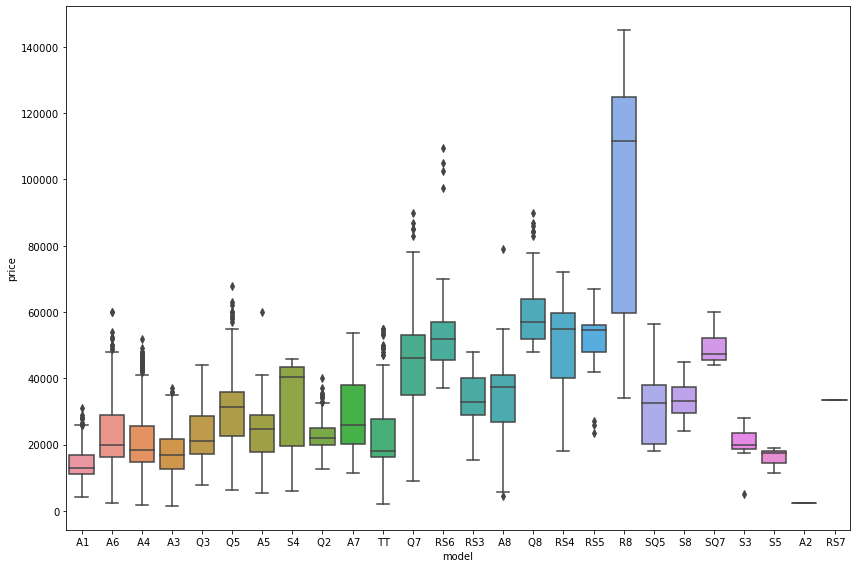

In [7]:
plt.figure(figsize=(12,8))
sns.boxplot(x='model',y='price',data=audi)
plt.tight_layout()

Due to the large number of models within the dataset, it is very difficult to make clear conclusions about how the model type affects the price. Let us group each model based on the first letter that appears in its name and reproduce the box plot.

In [8]:
audi['model_type'] = audi['model'].apply(lambda x : x.split()[0][0])

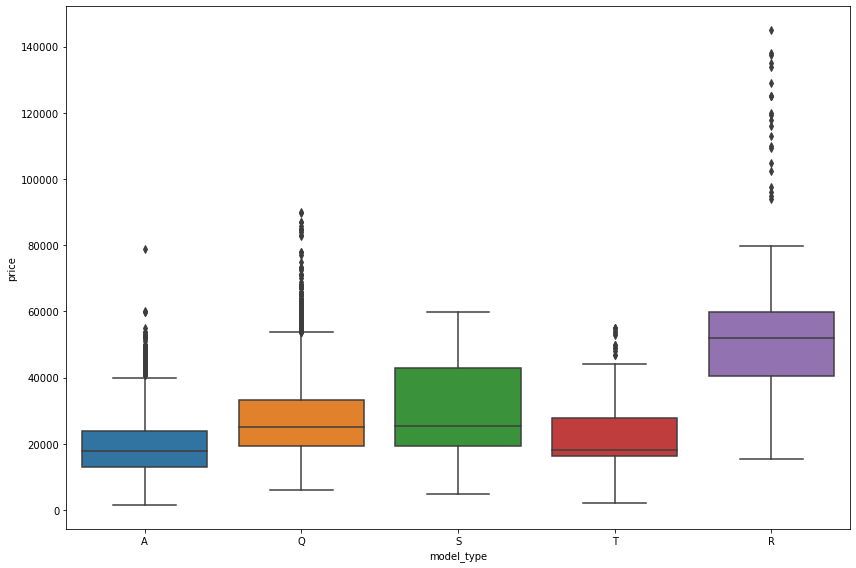

In [9]:
plt.figure(figsize=(12,8))
sns.boxplot(x='model_type',y='price',data=audi)
plt.tight_layout()

We can now clearly see that models with first letter 'R' are the most expensive cars that Audi produce. As well as this, we can see that there is a clear relationship between the model type and the price of the car. Let us produce boxplots for each model type individually by model to investigate the models within each class effect the price.

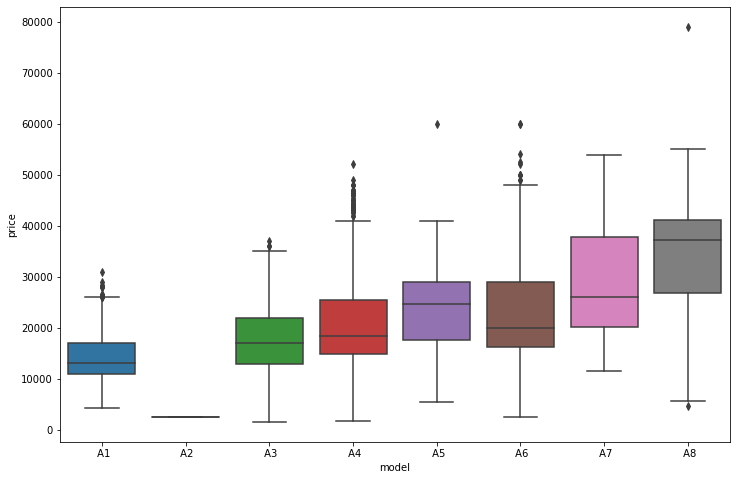

In [10]:
plt.figure(figsize=(12,8))
audi_a = audi[audi['model_type'] == 'A']
sns.boxplot(x='model',y='price',data=audi_a,order=[' A1',' A2',' A3',' A4',' A5',' A6',' A7',' A8'])

We can see that as the number of each model increases, the average price tends to increase also. However, this does not seem to hold true when considering the means of the "A5" and "A6" models. We notice that there seems to be something strange occuring for the "A2" model. Let us find this subset of data and investigate.

In [11]:
audi_a2 = audi[audi['model'] == ' A2']

In [12]:
audi_a2

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,model_type
10158,A2,2003,2490,Manual,100000,Diesel,30,65.7,1.4,A


We see that we have only one entry for the "A2" model, which is why the box plot above looks strange. We shall remove this point from the dataset since the production of the "A2" model stopped in 2005.

In [13]:
audi.drop(audi.index[10158], inplace=True)

Let us now move onto the "Q" model type.

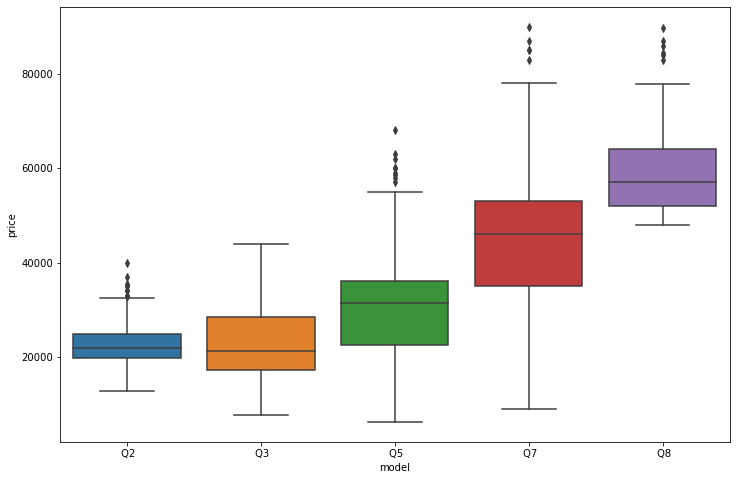

In [14]:
audi_q = audi[audi['model_type'] == 'Q']
plt.figure(figsize=(12,8))
sns.boxplot(x='model',y='price',data=audi_q,order=[' Q2',' Q3', ' Q5',' Q7', ' Q8'])

Once again we find that the average price of the car within the "Q" class increases with the number attached to it. The relationship between these figures seems exponential. 

Let us move onto the "T" type. In this case, the boxplot we produce will be exactly the same as the one produced above since Audi only produce the model "TT" which will fit into the "T" type we have described here. 

Let us consider the "S" type.

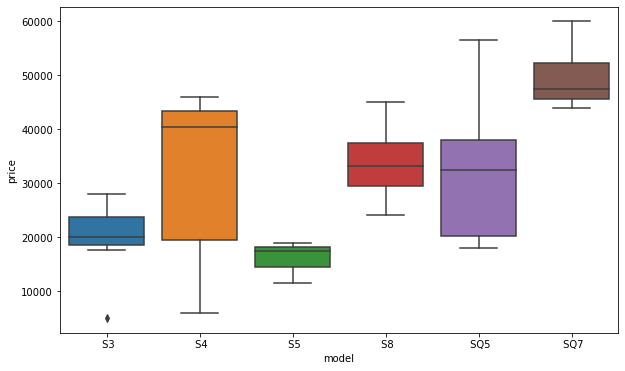

In [15]:
audi_s = audi[audi['model_type']=='S']
plt.figure(figsize=(10,6))
sns.boxplot(x='model',y='price',data=audi_s,order=[' S3',' S4',' S5',' S8',' SQ5',' SQ7'])

In this class, the previous observations regarding the relationship between the numbers and the price does not hold true.

Let us move onto the final type, "R".

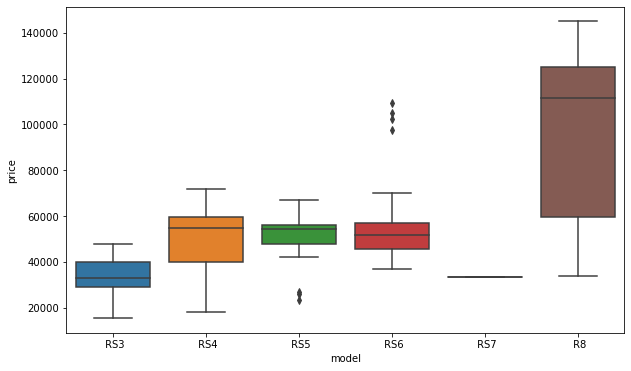

In [16]:
audi_r = audi[audi['model_type']=='R']
plt.figure(figsize=(10,6))
sns.boxplot(x='model',y='price',data=audi_r,order=[' RS3', ' RS4', ' RS5', ' RS6', ' RS7', ' R8'])

Once again the obersavtion made earlier holds true. The larger the number associated with the model, the higher the price, on average. 

As expected, we have found that the model of the car has a significant impact on the price of the car. 

#### Year

This variable relates to the year in which the car was first registered. In order to reduce the size of the numbers within this column, it may be better to consider a new variable "Age", which is the time that has passed, in years, since the car was first registered. We shall create this new column and analyse this instead.

In [17]:
audi['age'] = audi['year'].apply(lambda x: 2020 - x)

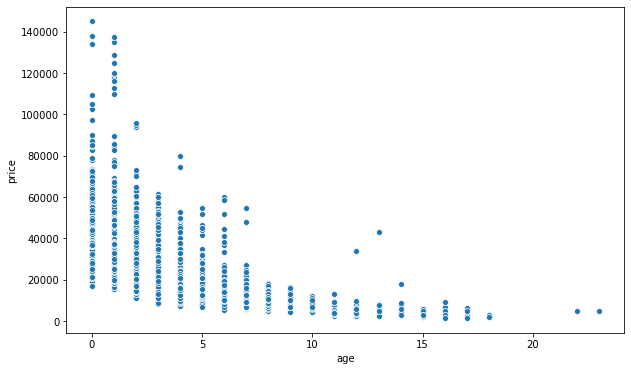

In [20]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='age',y='price',data=audi)

We can clearly see a negative exponential relationship between the age of the vehicle and its price.

#### Tax

Let us investigate how the rate of tax effects the price of the car.

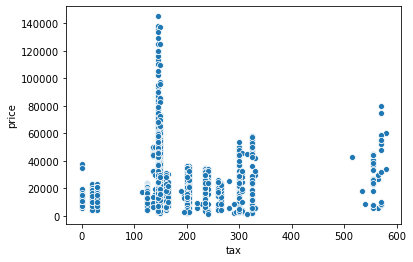

In [21]:
sns.scatterplot(x='tax',y='price',data=audi)

There seems to be no clear relationship between tax and the price of the vehicle.

#### MPG

Let us investigate whether the miles per gallon acheived by the car effects its sale price.

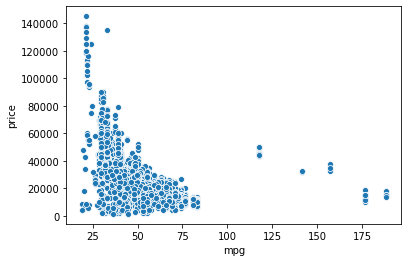

In [22]:
sns.scatterplot(x='mpg',y='price',data=audi)

There seems to be a slight negative exponential relationship between the miles per gallon and price.

#### Engine Size

Typically, vehicles with a larger engine size tend to cost most money to purchase than equivalent models with smaller engines. Let us investigate this.

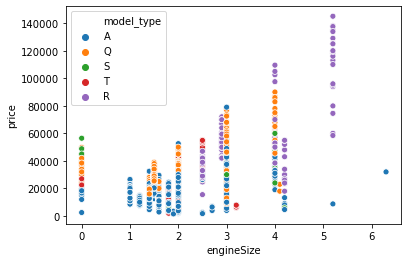

In [26]:
sns.scatterplot(x='engineSize',y='price',data=audi,hue = 'model_type')

Looking at each colour individually, we can see that the above claim holds true. Models with larger engines cost more on average to purchase than those with smaller engines.

#### Fuel Type

Commonly, diesel vehicles are more expensive to purchase than their petrol engined couterparts. Let us see whether we see the same pattern within this dataset.

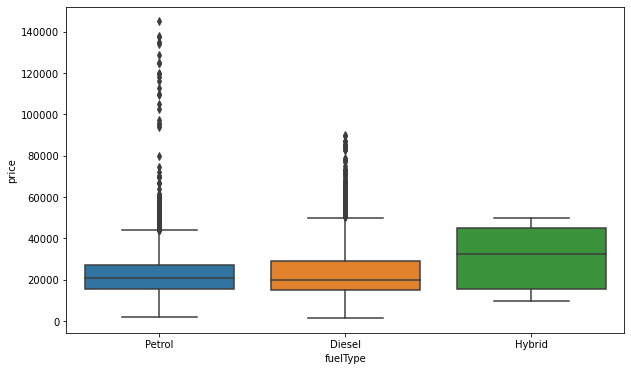

In [27]:
plt.figure(figsize=(10,6))
sns.boxplot(x='fuelType',y='price',data=audi)

In [31]:
petrol_mean = audi[(audi['fuelType'] == 'Petrol')]['price'].mean()
diesel_mean = audi[(audi['fuelType'] == 'Diesel')]['price'].mean()
hybrid_mean = audi[(audi['fuelType'] == 'Hybrid')]['price'].mean()

print("Petrol Cars Mean Price: ",petrol_mean)
print("Diesel Cars Mean Price: ",diesel_mean)
print("Hybrid Cars Mean Price: ",hybrid_mean)

Petrol Cars Mean Price:  22480.908354730396
Diesel Cars Mean Price:  23241.237087517933
Hybrid Cars Mean Price:  30191.75


We can see that the above statement is supported by the vehicles within this dataset. We also notice that hybrid vehicles are considerably more expensive to purchase, on average. This is due to the more advanced technology within these cars. 

#### Transmission Type

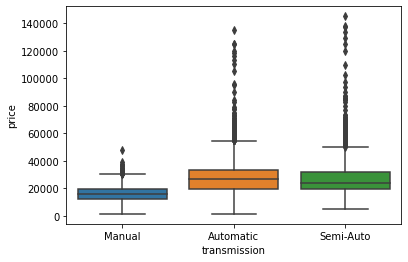

In [32]:
sns.boxplot(x='transmission',y='price',data=audi)

We can see that cars with manual transmission are on average cheaper to purchase than those with automatic or semi-automatic transmission. Once again, a major reason for this increase in price will be due to the advanced technology within these cars.


#### Mileage

Usually, the more miles a car travels, the lower its resale price.

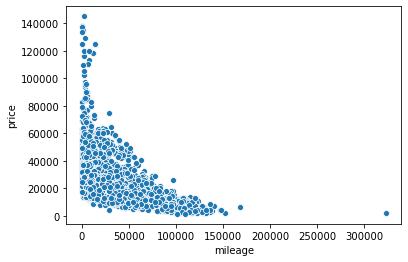

In [34]:
sns.scatterplot(x='mileage',y='price',data=audi)

This scatterplot supports the statement made above, as we can clearly see a strong, negative exponential relationship between the mileage and the price of the vehicle. 

#### Checking Correlation Values

Let us produce a correlation heatmap to check that our conclusions regarding the numerical values hold true.

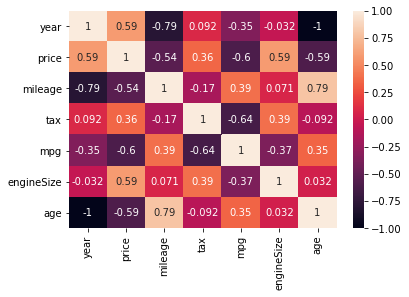

In [35]:
sns.heatmap(audi.corr(),annot=True)

The numbers shown in the heatmap above provide further evidence that the relationships found above hold true. 

## Dependent Variable Relationships

From the heatmap produced above, we notice that there are high levels of correlation between certain variables. In this section, we shall investigate each relationship in order to further understand our dataset.